In [1]:
import ssl
import pandas as pd

ssl._create_default_https_context = ssl._create_unverified_context

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header=None, encoding='utf-8')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values # 4 번째 칸 100개 출력(타겟 데이터)
y = np.where(y == 'Iris-setosa', -1, 1) # 1(Iris-setosa), -1(Iris-virginica)

X = df.iloc[0:100, [0, 2]].values # 0 => 꽃 받침 길이, 2 => 꽃잎 길이


Text(0.5, 1.0, 'Adaline - Learning rate 0.00059995559')

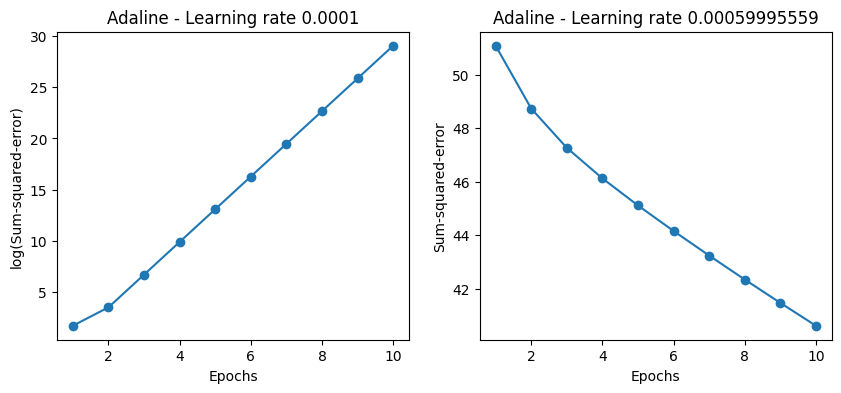

In [29]:
import numpy as np
from AdalineGD import AdalineGD
from matplotlib import pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.0001')

ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.00059995559')

/var/folders/cv/y8g_j3056h5dw85l1b41k7400000gn/T/ipykernel_2178/4096688004.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left')


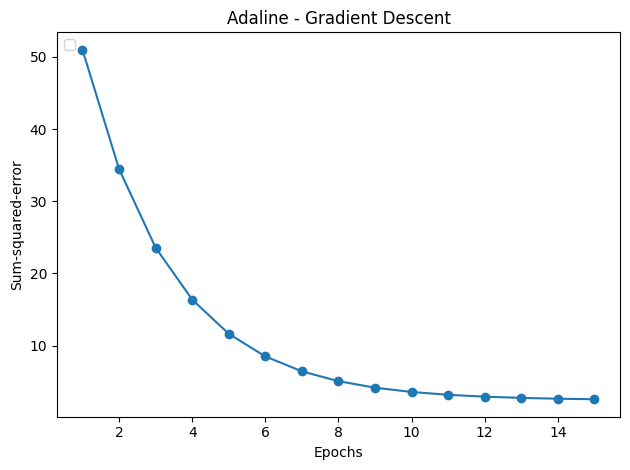

In [26]:
# standardization

X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

ada = AdalineGD(n_iter=15, eta=0.01).fit(X_std, y)

plt.title('Adaline - Gradient Descent')
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()